In [48]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy as scipy
from scipy import stats

In [49]:
df = pd.read_excel('MissionHospital_data.xlsx', sheet_name='MH-Modified Data')

In [50]:
df.shape

(248, 51)

248 rows and 51 columns in the dataset

In [51]:
df.head()

,SL.,AGE,GENDER,MALE,MARITAL STATUS,UNMARRIED,KEY COMPLAINTS -CODE,ACHD,CAD-DVD,CAD-SVD,...,TYPE OF ADMSN,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY - ICU,LENGTH OF STAY- WARD,IMPLANT USED (Y/N),IMPLANT,COST OF IMPLANT
0,1,58.0,M,0,MARRIED,0,other- heart,0,0,0,...,EMERGENCY,0,660293.0,13.400439,25,12,13,Y,1,38000
1,2,59.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,809130.0,13.603715,41,20,21,Y,1,39690
2,3,82.0,M,0,MARRIED,0,CAD-TVD,0,0,0,...,ELECTIVE,1,362231.0,12.800037,18,9,9,N,0,0
3,4,46.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,629990.0,13.353459,14,13,1,Y,1,89450
4,5,60.0,M,0,MARRIED,0,CAD-DVD,0,1,0,...,EMERGENCY,0,444876.0,13.005551,24,12,12,N,0,0


Renaming the columns by removing the blank spaces

In [52]:
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('-', '_')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 51 columns):
SL.                             248 non-null int64
AGE                             248 non-null float64
GENDER                          248 non-null object
MALE                            248 non-null int64
MARITAL_STATUS                  248 non-null object
UNMARRIED                       248 non-null int64
KEY_COMPLAINTS__CODE            212 non-null object
ACHD                            248 non-null int64
CAD_DVD                         248 non-null int64
CAD_SVD                         248 non-null int64
CAD_TVD                         248 non-null int64
CAD_VSD                         248 non-null int64
OS_ASD                          248 non-null int64
other__heart                    248 non-null int64
other__respiratory              248 non-null int64
other_general                   248 non-null int64
other_nervous                   248 non-null int64
other_tertalogy        

In [54]:
df = df.rename(columns={"KEY_COMPLAINTS__CODE": "KEY_COMPLAINTS_CODE", "other__heart": "other_heart",
                        "other__respiratory":"other_respiratory","BP__HIGH": "BP_HIGH",
                        "other__heart" : "other_heart",
                        "Ln(Total_Cost)": "ln_total_cost","TOTAL_COST_TO_HOSPITAL_":"TOTAL_COST_TO_HOSPITAL",
                       "LENGTH_OF_STAY__ICU" : "LENGTH_OF_STAY_ICU","IMPLANT_USED_(Y/N)" : "IMPLANT_USED","IMPLANT_" : "IMPLANT"})

In [55]:
df.columns = map(str.lower, df.columns)

Now, we have all the column names sorted we go ahead with data exploration

# Data Exploration

In [56]:
df.shape

(248, 51)

In [57]:
df.describe()

,sl.,age,male,unmarried,achd,cad_dvd,cad_svd,cad_tvd,cad_vsd,os_asd,...,transferred,alert,elective,total_cost_to_hospital,ln_total_cost,total_length_of_stay,length_of_stay___icu,length_of_stay__ward,implant,cost_of_implant
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,124.500000,28.879837,0.330645,0.564516,0.076613,0.108871,0.008065,0.096774,0.004032,0.060484,...,0.016129,0.995968,0.870968,198723.330282,12.062084,11.612903,3.475806,8.153226,0.197581,8544.201613
std,71.735626,25.899359,0.471397,0.496823,0.266514,0.312107,0.089621,0.296248,0.063500,0.238863,...,0.126227,0.063500,0.335914,122587.492984,0.505390,5.392617,3.853520,3.755793,0.398979,21521.877503
min,1.000000,0.032877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,46093.000000,10.738416,3.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,131652.750000,11.787923,8.000000,1.000000,6.000000,0.000000,0.000000
50%,124.500000,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,162660.500000,11.999419,10.000000,2.000000,7.000000,0.000000,0.000000
75%,186.250000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,220614.000000,12.304170,13.000000,4.000000,10.000000,0.000000,0.000000
max,248.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,887350.000000,13.695995,41.000000,30.000000,22.000000,1.000000,196848.000000


In [58]:
#Check for duplicate rows in the dataset
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows:" , duplicate_rows_df.shape)

number of duplicate rows: (0, 51)


In [59]:
#Now, we remove the unneccessary columns like sl. , gender, marital_status and other redundant columns from the dataset
df = df.drop(['sl.','gender','marital_status','key_complaints_code','past_medical_history_code','mode_of_arrival',
             'state_at_the_time_of_arrival','type_of_admsn','implant_used'], axis=1)

In [60]:
df.shape

(248, 42)

In [61]:
#Now, we check and modify the data types of the columns
df.dtypes

age                       float64
male                        int64
unmarried                   int64
achd                        int64
cad_dvd                     int64
cad_svd                     int64
cad_tvd                     int64
cad_vsd                     int64
os_asd                      int64
other_heart                 int64
other_respiratory           int64
other_general               int64
other_nervous               int64
other_tertalogy             int64
pm_vsd                      int64
rhd                         int64
body_weight               float64
body_height                 int64
hr_pulse                    int64
bp_high                   float64
bp_low                    float64
rr                          int64
diabetes1                   int64
diabetes2                   int64
hypertension1               int64
hypertension2               int64
hypertension3               int64
other                       int64
hb                        float64
urea          

In [62]:
df.describe()

,age,male,unmarried,achd,cad_dvd,cad_svd,cad_tvd,cad_vsd,os_asd,other_heart,...,transferred,alert,elective,total_cost_to_hospital,ln_total_cost,total_length_of_stay,length_of_stay___icu,length_of_stay__ward,implant,cost_of_implant
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,28.879837,0.330645,0.564516,0.076613,0.108871,0.008065,0.096774,0.004032,0.060484,0.221774,...,0.016129,0.995968,0.870968,198723.330282,12.062084,11.612903,3.475806,8.153226,0.197581,8544.201613
std,25.899359,0.471397,0.496823,0.266514,0.312107,0.089621,0.296248,0.063500,0.238863,0.416280,...,0.126227,0.063500,0.335914,122587.492984,0.505390,5.392617,3.853520,3.755793,0.398979,21521.877503
min,0.032877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,46093.000000,10.738416,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,131652.750000,11.787923,8.000000,1.000000,6.000000,0.000000,0.000000
50%,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,162660.500000,11.999419,10.000000,2.000000,7.000000,0.000000,0.000000
75%,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,220614.000000,12.304170,13.000000,4.000000,10.000000,0.000000,0.000000
max,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,887350.000000,13.695995,41.000000,30.000000,22.000000,1.000000,196848.000000


In [63]:
df.male.value_counts()

0    166
1     82
Name: male, dtype: int64

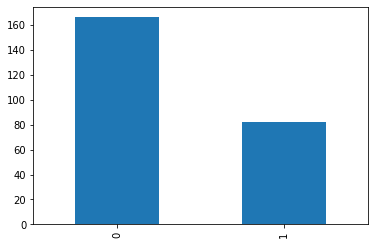

In [64]:
#Female population are 50% more than Male
df.male.value_counts().plot.bar()

In [65]:
df.age.describe()

count    248.000000
mean      28.879837
std       25.899359
min        0.032877
25%        6.000000
50%       15.500000
75%       55.000000
max       88.000000
Name: age, dtype: float64

Average age is 28. Min is 0.03 and Max is 88. Median being 15, the data seems to be right skewed

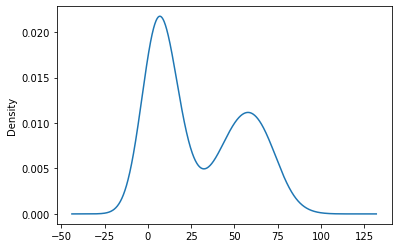

In [66]:
df.age.plot.density()

In [67]:
df.unmarried.value_counts()

1    140
0    108
Name: unmarried, dtype: int64

More Unmarried than married

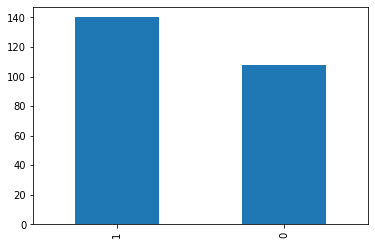

In [68]:
df.unmarried.value_counts().plot.bar()

In [69]:
df.achd.value_counts()

0    229
1     19
Name: achd, dtype: int64

In [70]:
df.cad_dvd.value_counts()

0    221
1     27
Name: cad_dvd, dtype: int64

In [71]:
df.cad_svd.value_counts()

0    246
1      2
Name: cad_svd, dtype: int64

Very Negligable number of records for cad_svd

In [72]:
df.cad_tvd.value_counts()

0    224
1     24
Name: cad_tvd, dtype: int64

In [73]:
df.cad_vsd.value_counts()

0    247
1      1
Name: cad_vsd, dtype: int64

Very negligable number of records for cad_vsd

In [74]:
df.os_asd.value_counts()

0    233
1     15
Name: os_asd, dtype: int64

In [75]:
df.other_heart.value_counts()

0    193
1     55
Name: other_heart, dtype: int64

In [76]:
df.other_respiratory.value_counts()

0    233
1     15
Name: other_respiratory, dtype: int64

In [77]:
df.other_general.value_counts()

0    247
1      1
Name: other_general, dtype: int64

Very negligable number of records for other_general

In [78]:
df.other_nervous.value_counts()

0    245
1      3
Name: other_nervous, dtype: int64

Very negligable number of records for other_nervous

In [79]:
df.other_tertalogy.value_counts()

0    230
1     18
Name: other_tertalogy, dtype: int64

In [80]:
df.pm_vsd.value_counts()

0    242
1      6
Name: pm_vsd, dtype: int64

In [81]:
df.rhd.value_counts()

0    222
1     26
Name: rhd, dtype: int64

We drop the features which are insignificant

In [82]:
df.drop(['cad_svd','cad_vsd','other_nervous','other_general'], axis=1)

,age,male,unmarried,achd,cad_dvd,cad_tvd,os_asd,other_heart,other_respiratory,other_tertalogy,...,transferred,alert,elective,total_cost_to_hospital,ln_total_cost,total_length_of_stay,length_of_stay___icu,length_of_stay__ward,implant,cost_of_implant
0,58.0,0,0,0,0,0,0,1,0,0,...,0,1,0,660293.0,13.400439,25,12,13,1,38000
1,59.0,0,0,0,1,0,0,0,0,0,...,0,1,0,809130.0,13.603715,41,20,21,1,39690
2,82.0,0,0,0,0,1,0,0,0,0,...,0,1,1,362231.0,12.800037,18,9,9,0,0
3,46.0,0,0,0,1,0,0,0,0,0,...,0,1,0,629990.0,13.353459,14,13,1,1,89450
4,60.0,0,0,0,1,0,0,0,0,0,...,0,1,0,444876.0,13.005551,24,12,12,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,51.0,0,0,0,0,0,0,1,0,0,...,0,1,1,295155.0,12.595256,10,3,7,1,35000
244,58.0,0,0,0,0,1,0,0,0,0,...,0,1,1,200321.0,12.207676,11,2,9,1,26000
245,44.0,0,0,0,0,1,0,0,0,0,...,0,1,1,191188.0,12.161013,13,5,8,0,0
246,60.0,0,0,0,0,0,0,1,0,0,...,0,1,0,202807.0,12.220010,9,6,3,0,0


In [83]:
df.shape

(248, 42)

In [84]:
df.body_weight.describe()

count    248.000000
mean      37.524677
std       23.118822
min        2.020000
25%       15.000000
50%       40.900000
75%       58.250000
max       85.000000
Name: body_weight, dtype: float64

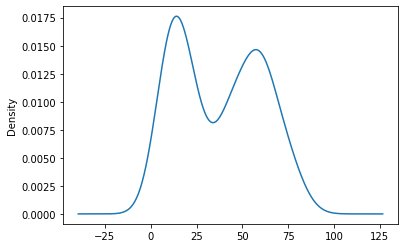

In [85]:
df.body_weight.plot.density()

In [86]:
#Combine weight and height to form bmi and drop the weight and height variables
df['bmi'] = df.body_weight / (df.body_height * df.body_height)* 10000
df.drop(['body_weight','body_height'], axis=1)
df.shape

(248, 43)

Export the dataframe into a csv file

In [88]:
df.to_csv('treated_data.csv', index = False)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 43 columns):
age                       248 non-null float64
male                      248 non-null int64
unmarried                 248 non-null int64
achd                      248 non-null int64
cad_dvd                   248 non-null int64
cad_svd                   248 non-null int64
cad_tvd                   248 non-null int64
cad_vsd                   248 non-null int64
os_asd                    248 non-null int64
other_heart               248 non-null int64
other_respiratory         248 non-null int64
other_general             248 non-null int64
other_nervous             248 non-null int64
other_tertalogy           248 non-null int64
pm_vsd                    248 non-null int64
rhd                       248 non-null int64
body_weight               248 non-null float64
body_height               248 non-null int64
hr_pulse                  248 non-null int64
bp_high                   225 non-nu

In [90]:
df.hr_pulse

0      118
1       78
2      100
3      122
4       72
      ... 
243     62
244     58
245     68
246     98
247     87
Name: hr_pulse, Length: 248, dtype: int64